In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [6]:
import geocoder
import csv
location = [43.65501,-79.42021]

In [13]:
from numpy import random
from scipy.spatial import distance

In [14]:
campus = [[43.657946,-79.39993],
          [43.663502,-79.40005],
          [43.663051,-79.402196],
          [43.665429,-79.398975]
         ]

campus_dict = {(43.657946,-79.39993):4495.8,
               (43.663502,-79.400050):2653,
               (43.663051,-79.402196):3574,
               (43.665429,-79.398975):2304
              }

waterfront = [[43.648208,-79.370923],
              [43.642711,-79.394043],
              [43.639944,-79.387032],
              [43.640625,-79.3932],
              [43.640093,-79.380152]
             ]

waterfront_dict = {(43.648208,-79.370923):330,
              (43.642711,-79.394043):745,
              (43.639944,-79.387032):128,
              (43.640625,-79.3932):154,
              (43.640093,-79.380152):235
             }          
castleFrank = [[43.673792,-79.368187]]

castleFrank_dict = {(43.673792,-79.368187):3413}

In [15]:
col_df = pd.DataFrame.from_csv('toronto_cycling_central_mode.csv', index_col='id')
col_df = col_df.sort_index()
col_df.head()

,injury,safety_equip,road_class,cyclist_crash_type,age_of_cyclist,stname1,stet_1_type,stname_2,stet_2_type,long,...,acc_time2,traffic_control,road_surface2,date,date2,driver_action,driver_condition,year,intersection,coords
id,,,,,,,,,,,,,,,,,,,,,
4.0,Minimal,Unrecorded,Local,Unrecorded,34.0,EUCLID,AV,ULSTER,ST,-79.413300,...,08:00:00,no control,loose snow,1986-01-14 00:00:00,1986-01-14 00:00:00,Lost control,Normal,1986.0,"Euclid Ave & Ulster St, Toronto, Ontario, M6G","[43.65906013500046, -79.41272077799965]"
7.0,Minimal,Unrecorded,Major Arterial,Unrecorded,34.0,SALEM,AV,FERNBANK,AV,-79.433801,...,10:00:00,no control,slush,1986-01-28 00:00:00,1986-01-28 00:00:00,Driving properly,Normal,1986.0,"Fernbank Ave & Salem Ave, Toronto, Ontario, M6H","[43.66582101600045, -79.43379108299968]"
8.0,Minor,Unrecorded,Major Arterial,Unrecorded,24.0,DUNDAS,ST,BEVERLEY,ST,-79.394060,...,08:00:00,traffic signal,wet,1986-01-16 00:00:00,1986-01-16 00:00:00,Failed to yield right-of-way,Normal,1986.0,"Beverley St & Dundas St W, Toronto, Ontario, M5T","[43.65382045300049, -79.39385107199968]"
9.0,Minimal,Unrecorded,Major Arterial,Unrecorded,24.0,BLOOR,ST,MARGUERETTA,ST,-79.440590,...,19:00:00,no control,wet,1986-02-19 00:00:00,1986-02-19 00:00:00,Failed to yield right-of-way,Normal,1986.0,"Bloor St W & Margueretta, Toronto, Ontario, M6H","[43.658975,-79.439718]"
10.0,Minor,Unrecorded,Minor Arterial,Unrecorded,54.0,AVENUE,RD,SHANLY,ST,-79.430720,...,15:00:00,stop sign,dry,1986-03-01 00:00:00,1986-03-01 00:00:00,Driving properly,Normal,1986.0,"Dovercourt Rd & Shanly St, Toronto, Ontario, M6H","[43.664316,-79.430499]"


In [102]:
coords = central_col_df[["stname1","stname_2","street_1_type","street_2_type"]]
coords= coords.values.tolist()
coordinate_list=[]
for pair in coords:
    if isinstance(pair[1],str): 
        if pair[1] <= pair[0]:
            temp = pair[0]
            pair[0] = pair[1]
            pair[1] = temp
            temp = pair[2]
            pair[2] = pair[3]
            pair[3] = temp
coords2 = coords
for pair2 in coords2:
    pair2 = str(pair2[0]) + ' ' + str(pair2[2]) + ' & ' + str(pair2[1]) + ' ' + str(pair2[3]) + ', Toronto'
    coordinate_list.append(pair2)

In [ ]:
coords = col_df[["STNAME1","STNAME 2","STET 1 TYPE","STET 2 TYPE"]]
coords= coords.values.tolist()
coordinate_list=[]
for pair in coords:
    if isinstance(pair[1],str): 
        if pair[1] <= pair[0]:
            temp = pair[0]
            pair[0] = pair[1]
            pair[1] = temp
            temp = pair[2]
            pair[2] = pair[3]
            pair[3] = temp
coords2 = coords
for pair2 in coords2:
    pair2 = str(pair2[0]) + ' ' + str(pair2[2]) + ' & ' + str(pair2[1]) + ' ' + str(pair2[3]) + ', Toronto'
    coordinate_list.append(pair2)

In [16]:
ped_counts_df = pd.DataFrame.from_csv('Vehicle and Pedestrian Counts/TrafficPedestrianVolumes_2011.csv')

Using the Power fit for the Bike/Pedestrian ratio, we get a function that predicts the bike numbers at any one intersection.

In [17]:
ped_counts_df['bike_prediction'] = (500.2146799711*ped_counts_df['8HrPedVol']**(-0.8950759596))*ped_counts_df['8HrPedVol']

In [18]:
ped_counts_df.head()

,Main,Midblock Route,Side 1 Route,Side 2 Route,Activation Date,Latitude,Longitude,Count Date,8HrPedVol,8HrVehVol,24HrPedVol,24HrVehVol,bike_prediction
PX2,,,,,,,,,,,,,
2,JARVIS ST,NaN,FRONT ST E,NaN,1948/11/15,43.649450,-79.371410,2011/09/08,17008,19335,34016,38670,1390.124396
3,KING ST E,NaN,JARVIS ST,NaN,1950/08/23,43.650461,-79.371924,2011/09/07,37719,17665,75438,35330,1511.289334
4,JARVIS ST,NaN,ADELAIDE ST E,NaN,1958/09/12,43.651534,-79.372360,2008/06/16,1991,19726,3982,39452,1109.962532
5,JARVIS ST,NaN,RICHMOND ST E,NaN,1962/04/21,43.652718,-79.372824,2009/07/30,2696,24842,5392,49684,1145.833262
6,JARVIS ST,NaN,QUEEN ST E,NaN,1928/08/24,43.653704,-79.373238,2011/05/18,3622,19772,7244,39544,1181.886259


In [19]:
ped_coords = ped_counts_df[['Latitude','Longitude']]
ped_coords = ped_coords.replace(np.nan,0)
ped_coordinate_list = ped_coords.values.tolist()


In [20]:
ped_counts_df['coordinates'] = ped_counts_df[['Latitude','Longitude']].apply(tuple, axis=1)
ped_counts_df.head()

,Main,Midblock Route,Side 1 Route,Side 2 Route,Activation Date,Latitude,Longitude,Count Date,8HrPedVol,8HrVehVol,24HrPedVol,24HrVehVol,bike_prediction,coordinates
PX2,,,,,,,,,,,,,,
2,JARVIS ST,NaN,FRONT ST E,NaN,1948/11/15,43.649450,-79.371410,2011/09/08,17008,19335,34016,38670,1390.124396,"(43.64945, -79.37141)"
3,KING ST E,NaN,JARVIS ST,NaN,1950/08/23,43.650461,-79.371924,2011/09/07,37719,17665,75438,35330,1511.289334,"(43.6504606, -79.3719239)"
4,JARVIS ST,NaN,ADELAIDE ST E,NaN,1958/09/12,43.651534,-79.372360,2008/06/16,1991,19726,3982,39452,1109.962532,"(43.6515337, -79.37236)"
5,JARVIS ST,NaN,RICHMOND ST E,NaN,1962/04/21,43.652718,-79.372824,2009/07/30,2696,24842,5392,49684,1145.833262,"(43.6527176, -79.372824)"
6,JARVIS ST,NaN,QUEEN ST E,NaN,1928/08/24,43.653704,-79.373238,2011/05/18,3622,19772,7244,39544,1181.886259,"(43.653704, -79.373238)"


In [21]:
ped_dict = ped_counts_df.set_index('coordinates').to_dict()['bike_prediction']

In [22]:
col_df['coordinates'] = col_df[['lat','long']].apply(tuple, axis=1)
col_df.head()

,injury,safety_equip,road_class,cyclist_crash_type,age_of_cyclist,stname1,stet_1_type,stname_2,stet_2_type,long,...,traffic_control,road_surface2,date,date2,driver_action,driver_condition,year,intersection,coords,coordinates
id,,,,,,,,,,,,,,,,,,,,,
4.0,Minimal,Unrecorded,Local,Unrecorded,34.0,EUCLID,AV,ULSTER,ST,-79.413300,...,no control,loose snow,1986-01-14 00:00:00,1986-01-14 00:00:00,Lost control,Normal,1986.0,"Euclid Ave & Ulster St, Toronto, Ontario, M6G","[43.65906013500046, -79.41272077799965]","(43.6599, -79.4133)"
7.0,Minimal,Unrecorded,Major Arterial,Unrecorded,34.0,SALEM,AV,FERNBANK,AV,-79.433801,...,no control,slush,1986-01-28 00:00:00,1986-01-28 00:00:00,Driving properly,Normal,1986.0,"Fernbank Ave & Salem Ave, Toronto, Ontario, M6H","[43.66582101600045, -79.43379108299968]","(43.665832, -79.433801)"
8.0,Minor,Unrecorded,Major Arterial,Unrecorded,24.0,DUNDAS,ST,BEVERLEY,ST,-79.394060,...,traffic signal,wet,1986-01-16 00:00:00,1986-01-16 00:00:00,Failed to yield right-of-way,Normal,1986.0,"Beverley St & Dundas St W, Toronto, Ontario, M5T","[43.65382045300049, -79.39385107199968]","(43.65377, -79.39406)"
9.0,Minimal,Unrecorded,Major Arterial,Unrecorded,24.0,BLOOR,ST,MARGUERETTA,ST,-79.440590,...,no control,wet,1986-02-19 00:00:00,1986-02-19 00:00:00,Failed to yield right-of-way,Normal,1986.0,"Bloor St W & Margueretta, Toronto, Ontario, M6H","[43.658975,-79.439718]","(43.6588, -79.44059)"
10.0,Minor,Unrecorded,Minor Arterial,Unrecorded,54.0,AVENUE,RD,SHANLY,ST,-79.430720,...,stop sign,dry,1986-03-01 00:00:00,1986-03-01 00:00:00,Driving properly,Normal,1986.0,"Dovercourt Rd & Shanly St, Toronto, Ontario, M6H","[43.664316,-79.430499]","(43.66425, -79.43072)"


In [23]:
central_col_df = col_df

In [38]:
#only run after above cell already has produced output. Otherwise file doesn't exist. 
import csv
with open('closest_traffic_count.csv', 'r') as f:
    reader = csv.reader(f)
    closest_traffic_count = list(reader)

In [24]:
import matplotlib.path as mplPath
import numpy as np

waterfront_Path = mplPath.Path(np.array([[43.635497, -79.398156],
[43.639000, -79.400725],
[43.640822, -79.401427],
[43.646984, -79.376977],
[43.649889, -79.370343],
[43.651614, -79.362725],
[43.648090, -79.361191],
[43.646451, -79.361937],
[43.641209, -79.376739],
[43.639969, -79.379965],
[43.637698, -79.391847],
[43.635666, -79.398368],
[43.636489, -79.399603]]))

waterfront_Path.contains_point((200, 100))

False

In [25]:
campus_Path = mplPath.Path(np.array([[43.659838, -79.399772],
[43.661388, -79.401006],
[43.665592, -79.402705],
[43.666768, -79.401354],
[43.668213, -79.393958],
[43.663141, -79.392719],
[43.659264, -79.394100],
[43.658329, -79.398204]]
))

campus_Path.contains_point((43.661013, -79.397200))

True

In [26]:
castleFrank_Path = mplPath.Path(np.array([[43.672105, -79.376696],
[43.671562, -79.370962],
[43.674418, -79.366821],
[43.676086, -79.358731],
[43.677056, -79.354021],
[43.677040, -79.355126],
[43.677622, -79.358516],
[43.676194, -79.359503],
[43.675170, -79.364760],
[43.674580, -79.367539],
[43.672019, -79.371112],
[43.672710, -79.376927]]
))

castleFrank_Path.contains_point((43.676120, -79.359035))

True

In [27]:
import csv
closest_traffic_point = []
bike_traffic = []
i = 0
for i in range(0,len(central_col_df)):
    point = central_col_df['coordinates'].iloc[i]
    if waterfront_Path.contains_point(point):
        closest = waterfront[distance.cdist([point], waterfront).argmin()]
        closest_traffic_point.append(tuple(closest))
        bike_traffic.append(waterfront_dict[tuple(closest)])
    elif campus_Path.contains_point(point):
        closest = campus[distance.cdist([point], campus).argmin()]
        closest_traffic_point.append(tuple(closest))
        bike_traffic.append(campus_dict[tuple(closest)])
    elif castleFrank_Path.contains_point(point):
        closest = castleFrank[distance.cdist([point], castleFrank).argmin()]
        closest_traffic_point.append(tuple(closest))
        bike_traffic.append(castleFrank_dict[tuple(closest)])
    else:
        closest = ped_coordinate_list[distance.cdist([point], ped_coordinate_list).argmin()]
        closest_traffic_point.append(tuple(closest))
        bike_traffic.append(ped_dict[tuple(closest)])
        
myfile3 = open('closest_intersection.csv', 'w')
wr = csv.writer(myfile3)
wr.writerow(closest_traffic_point)
myfile3.close()

myfile4 = open('closest_int_bike_predictions.csv', 'w')
wr = csv.writer(myfile4)
wr.writerow(bike_traffic)
myfile4.close()

In [28]:
bike_traffic[:10]

[1145.9669774671361,
 1043.663994458788,
 1235.7081763712024,
 1083.2871929951482,
 1043.663994458788,
 1409.2143012952026,
 1120.2506065859702,
 1432.4371794221831,
 864.05610391248706,
 1214.3963006224874]

In [29]:
central_col_df['closest_traffic'] = tuple(closest_traffic_point)
central_col_df['traffic_count'] = bike_traffic

central_col_df.rename(columns={'closest_traffic': 'closest_ped_count', 'traffic_count':'predicted_bike_count'})
central_col_df.head()

,injury,safety_equip,road_class,cyclist_crash_type,age_of_cyclist,stname1,stet_1_type,stname_2,stet_2_type,long,...,date,date2,driver_action,driver_condition,year,intersection,coords,coordinates,closest_traffic,traffic_count
id,,,,,,,,,,,,,,,,,,,,,
4.0,Minimal,Unrecorded,Local,Unrecorded,34.0,EUCLID,AV,ULSTER,ST,-79.413300,...,1986-01-14 00:00:00,1986-01-14 00:00:00,Lost control,Normal,1986.0,"Euclid Ave & Ulster St, Toronto, Ontario, M6G","[43.65906013500046, -79.41272077799965]","(43.6599, -79.4133)","(43.66055, -79.41466000000001)",1145.966977
7.0,Minimal,Unrecorded,Major Arterial,Unrecorded,34.0,SALEM,AV,FERNBANK,AV,-79.433801,...,1986-01-28 00:00:00,1986-01-28 00:00:00,Driving properly,Normal,1986.0,"Fernbank Ave & Salem Ave, Toronto, Ontario, M6H","[43.66582101600045, -79.43379108299968]","(43.665832, -79.433801)","(43.66717180000001, -79.43169820000001)",1043.663994
8.0,Minor,Unrecorded,Major Arterial,Unrecorded,24.0,DUNDAS,ST,BEVERLEY,ST,-79.394060,...,1986-01-16 00:00:00,1986-01-16 00:00:00,Failed to yield right-of-way,Normal,1986.0,"Beverley St & Dundas St W, Toronto, Ontario, M5T","[43.65382045300049, -79.39385107199968]","(43.65377, -79.39406)","(43.65381040000001, -79.39383199999999)",1235.708176
9.0,Minimal,Unrecorded,Major Arterial,Unrecorded,24.0,BLOOR,ST,MARGUERETTA,ST,-79.440590,...,1986-02-19 00:00:00,1986-02-19 00:00:00,Failed to yield right-of-way,Normal,1986.0,"Bloor St W & Margueretta, Toronto, Ontario, M6H","[43.658975,-79.439718]","(43.6588, -79.44059)","(43.6591, -79.43918000000002)",1083.287193
10.0,Minor,Unrecorded,Minor Arterial,Unrecorded,54.0,AVENUE,RD,SHANLY,ST,-79.430720,...,1986-03-01 00:00:00,1986-03-01 00:00:00,Driving properly,Normal,1986.0,"Dovercourt Rd & Shanly St, Toronto, Ontario, M6H","[43.664316,-79.430499]","(43.66425, -79.43072)","(43.66717180000001, -79.43169820000001)",1043.663994


In [41]:
intersection_df = central_col_df.groupby('intersection').agg({'traffic_count':[np.size,np.mean]}).sort_values(by=[('traffic_count','mean')],ascending=False)
intersection_df.head(10)

traffic_count             
                                                            size         mean
intersection                                                                 
Galbraith Rd & St George St, Toronto, Ontario, M5S           3.0  4495.800000
Huron St & Russell St, Toronto, Ontario, M5S                 3.0  4495.800000
Russell St & St George St, Toronto, Ontario, M5S            11.0  3695.329056
Willcocks St & Spadina Ave, Toronto, Ontario, M5S            1.0  3574.000000
Glen Morris St & Spadina Ave, Toronto, Ontario,...           1.0  3574.000000
Prince Edward Viad & Bayview Ave, Toronto, Onta...           1.0  3413.000000
Howard St & Ontario St, Toronto, Ontario, M4X                1.0  3413.000000
Howard St & Rose Ave, Toronto, Ontario, M4X                  5.0  3413.000000
Bloor St E & Castle Frank Cres, Toronto, Ontari...          20.0  3413.000000
Bloor St E & Parliament St, Toronto, Ontario, M4W           26.0  3413.000000

In [40]:
intersection_df = central_col_df.groupby('intersection').agg({'traffic_count':[np.size,np.mean]}).sort_values(by=[('traffic_count','size')],ascending=False)
intersection_df.head(10)

traffic_count             
                                                            size         mean
intersection                                                                 
Queen St W & Spadina Ave, Toronto, Ontario, M5V             74.0  1314.307288
Bay St & Dundas St W, Toronto, Ontario, M5G                 71.0  1504.051740
Queen St W & University Ave, Toronto, Ontario, M5H          64.0  1337.865922
Bloor St E & Yonge St, Toronto, Ontario, M4W                63.0  1439.906704
Bathurst St & Queen St W, Toronto, Ontario, M5T             61.0  1270.732436
Bathurst St & College St, Toronto, Ontario, M5S             60.0  1248.605392
King St W & York St, Toronto, Ontario, M5H                  58.0  1274.090650
Bay St & King St W, Toronto, Ontario, M5H                   57.0  1436.424115
Dundas St E & Yonge St, Toronto, Ontario, M5B               57.0  1546.272908
College St & University Ave, Toronto, Ontario, M5G          55.0  1325.051617

In [60]:
intersection_df['traffic_count','normalized_accident_rate'] = intersection_df['traffic_count','size']/(24*intersection_df['traffic_count','mean'])
intersection_df = intersection_df.sort_values(by=[('traffic_count','normalized_accident_rate')],ascending=False)
intersection_df.head(20)

traffic_count               \
                                                            size         mean   
intersection                                                                    
Front St W & York St, Toronto, Ontario, M5J                 29.0   276.607735   
Front St W & John St, Toronto, Ontario, M5V                 17.0   199.933112   
Queens Quay W & Rees St, Toronto, Ontario, M5J               9.0   139.888889   
Bay St & Queens Quay W, Toronto, Ontario, M5J               18.0   288.928665   
Queens Quay W & York St, Toronto, Ontario, M5J              18.0   289.316788   
Yonge St & The Esplanade, Toronto, Ontario, M5E             20.0   330.000000   
Station St & York St, Toronto, Ontario, M5J                 14.0   235.000000   
Lake Shore Blvd W & York St, Toronto, Ontario, M5J          14.0   235.000000   
Queen St W & Spadina Ave, Toronto, Ontario, M5V             74.0  1314.307288   
Lake Shore Blvd E & Yonge St, Toronto, Ontario,...          13.0   235.000000   
Bathurst St & College St, Toronto, Ontario, M5S             60.0  1248.605392   
Bathurst St & Queen St W, Toronto, Ontario, M5T             61.0  1270.732436   
Queen St W & University Ave, Toronto, Ontario, M5H          64.0  1337.865922   
Bay St & Dundas St W, Toronto, Ontario, M5G                 71.0  1504.051740   
Bay St & Lake Shore Blvd W, Toronto, Ontario, M5J           11.0   235.000000   
College St & Shaw St, Toronto, Ontario, M6G                 53.0  1153.924281   
King St W & York St, Toronto, Ontario, M5H                  58.0  1274.090650   
Lake Shore Blvd W & Spadina Ave, Toronto, Ontar...           7.0   154.000000   
Bloor St W & Keele St, Toronto, Ontario, M6P                49.0  1113.959596   
Bloor St E & Yonge St, Toronto, Ontario, M4W                63.0  1439.906704   

                                                                             
                                                   normalized_accident_rate  
intersection                                                                 
Front St W & York St, Toronto, Ontario, M5J                        0.004368  
Front St W & John St, Toronto, Ontario, M5V                        0.003543  
Queens Quay W & Rees St, Toronto, Ontario, M5J                     0.002681  
Bay St & Queens Quay W, Toronto, Ontario, M5J                      0.002596  
Queens Quay W & York St, Toronto, Ontario, M5J                     0.002592  
Yonge St & The Esplanade, Toronto, Ontario, M5E                    0.002525  
Station St & York St, Toronto, Ontario, M5J                        0.002482  
Lake Shore Blvd W & York St, Toronto, Ontario, M5J                 0.002482  
Queen St W & Spadina Ave, Toronto, Ontario, M5V                    0.002346  
Lake Shore Blvd E & Yonge St, Toronto, Ontario,...                 0.002305  
Bathurst St & College St, Toronto, Ontario, M5S                    0.002002  
Bathurst St & Queen St W, Toronto, Ontario, M5T                    0.002000  
Queen St W & University Ave, Toronto, Ontario, M5H                 0.001993  
Bay St & Dundas St W, Toronto, Ontario, M5G                        0.001967  
Bay St & Lake Shore Blvd W, Toronto, Ontario, M5J                  0.001950  
College St & Shaw St, Toronto, Ontario, M6G                        0.001914  
King St W & York St, Toronto, Ontario, M5H                         0.001897  
Lake Shore Blvd W & Spadina Ave, Toronto, Ontar...                 0.001894  
Bloor St W & Keele St, Toronto, Ontario, M6P                       0.001833  
Bloor St E & Yonge St, Toronto, Ontario, M4W                       0.001823

In [61]:
df_test = intersection_df['traffic_count','normalized_accident_rate']
df = df_test.to_frame(name='normalized yearly accident rate')
df['total collisions'] = intersection_df['traffic_count','size']
df['traffic estimate'] = intersection_df['traffic_count','mean']
df = df.dropna()
len(df)

1449

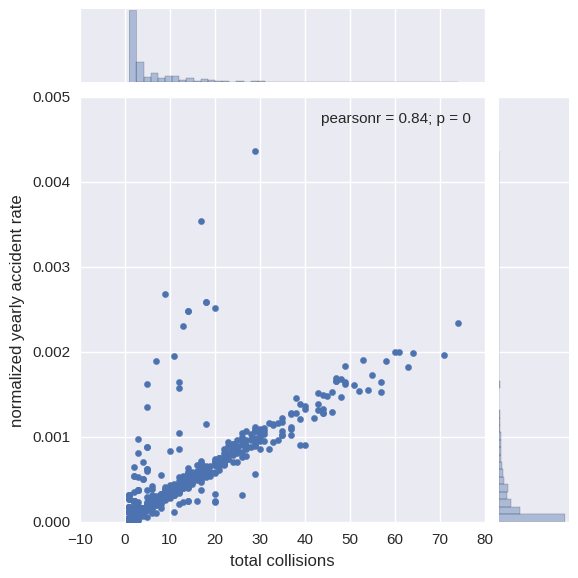

In [75]:
sns.set_context("notebook", font_scale=1.1)
scatter = sns.jointplot(x='total collisions', y = 'normalized yearly accident rate', data = df, ylim= (0,0.005))

In [47]:
intersection_df.to_csv('totals_test.csv')
df.head(10)

,normalized accident rate,total collisions,traffic estimate
intersection,,,
"Front St W & York St, Toronto, Ontario, M5J",0.104842,29.0,276.607735
"Front St W & John St, Toronto, Ontario, M5V",0.085028,17.0,199.933112
"Queens Quay W & Rees St, Toronto, Ontario, M5J",0.064337,9.0,139.888889
"Bay St & Queens Quay W, Toronto, Ontario, M5J",0.062299,18.0,288.928665
"Queens Quay W & York St, Toronto, Ontario, M5J",0.062216,18.0,289.316788
"Yonge St & The Esplanade, Toronto, Ontario, M5E",0.060606,20.0,330.000000
"Station St & York St, Toronto, Ontario, M5J",0.059574,14.0,235.000000
"Lake Shore Blvd W & York St, Toronto, Ontario, M5J",0.059574,14.0,235.000000
"Queen St W & Spadina Ave, Toronto, Ontario, M5V",0.056303,74.0,1314.307288


In [52]:
import scipy.stats as stats

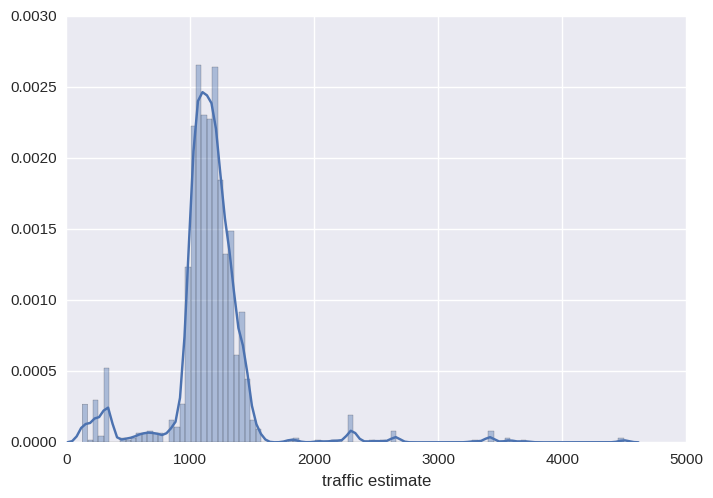

In [49]:
sns.distplot(df["traffic estimate"], bins = 100)

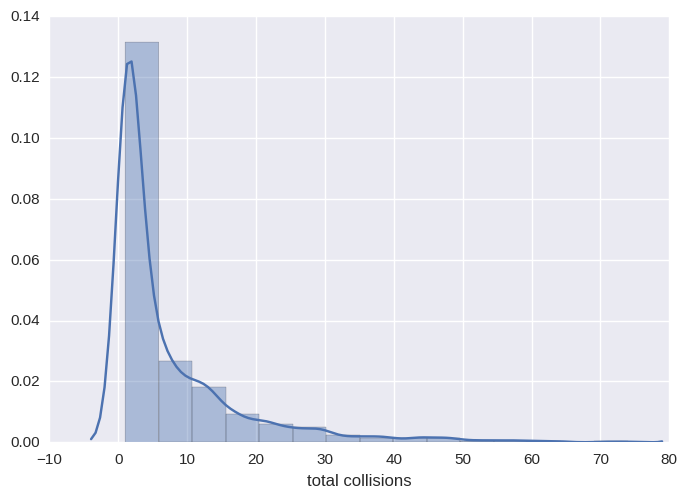

In [35]:
sns.distplot(df["total collisions"], bins = 15)

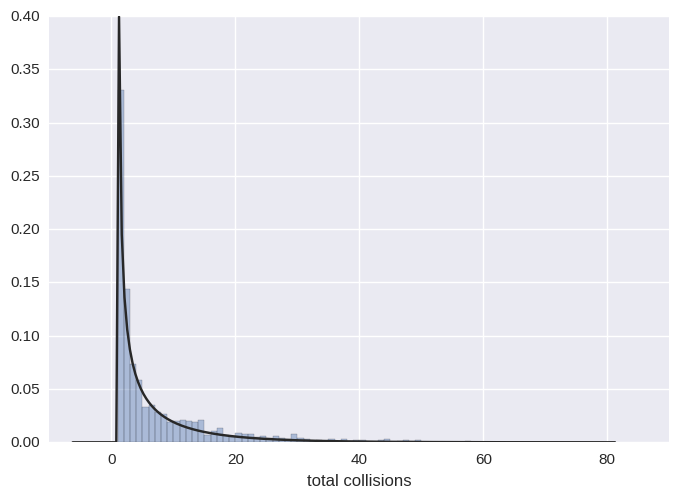

In [82]:
sns.distplot(df["total collisions"], fit=stats.gamma,  bins=range(0, 75, 1), kde=False)

A gamma distribution looks like a good choice. We know that we are dealing with sums of poission distributions where each intersection is basically a poisson process, with the mean accidents for a year being the parameter. So the above histogram is really summing up the number of accidents each year, over these poisson processes. While we could try and fit each intersection individually, this is a whole lot of work. And it's not clear how one would use these estimated parameters to compute the prior distribution for the ensemble. 

A gamma distribution looks nice, and intuitively makes sense since the prior for a poisson distribution is a gamma. Trying to read up on the intuition for how a ensemble of Poisson processes, each with their own paramater (not merely the same), hasn't lead me to any intuition for why I should stick with a gamma distribution for the entire ensemble, but it's a nice fit. 

In [80]:
stats.gamma.fit(df['total collisions'])

(0.3457292036111696, 0.99999999999999978, 13.068355505386879)